# Fall 2022 Data Science Intern Challenge 

#### Darren Ho

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Question 1

Given some sample data, write a program to answer the following: [click here to access the required data set](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0)

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

- Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
- What metric would you report for this dataset?
- What is its value?

In [2]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
# descriptive stats of int type columns

df.select_dtypes(include=['int']).describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [5]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

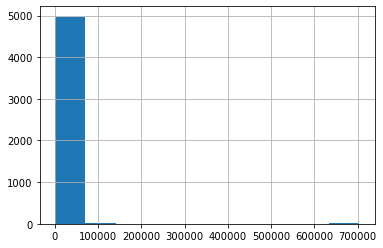

In [6]:
df['order_amount'].hist()
plt.show()

<AxesSubplot:xlabel='order_amount'>

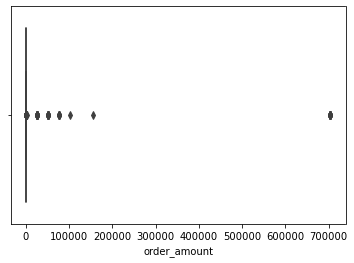

In [7]:
sns.boxplot(x=df['order_amount'])

In [8]:
print('Naively Calculated AOV: $',sum(df['order_amount']) / len(df['order_amount']))

Naively Calculated AOV: $ 3145.128


## Question 1a 
- Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

Answering the first bullet point, we see that the "naively calculated AOV" of $3145.13 is actually the average amount per unique order, or the mean of the `order_amount` column. This column may not be the best way to evaluate this data because it is heavily skewed. 

The proper way of calculating the AOV (Average Order Value) is to divide revenue by number of orders, so lets explore that.   

In [9]:
# Calculating AOV

aov = sum(df['order_amount']) / sum(df['total_items'])
print('Average Order Value: $',round(aov,2))

Average Order Value: $ 357.92


We find that the `AOV` value should be \\$357.92. This value tells us that, on average, a customer spends \\$357.92 per order. Although we have greatly reduced the `AOV` value, it still seems to be a bit high in terms of what an average customer would spend per order.

Let's take a look at the median value of `order_amount` since medians are more resistant to outliers than means are. 

In [10]:
# Median 

median = df['order_amount'].median()
print('Median Order Amount: $', median)

Median Order Amount: $ 284.0


## Question 1b
- What metric would you report for this dataset?

For this dataset, I would report the median of `order_amount` as the median is more resistant against outliers as our data is heavily skewed.

## Question 1c
- What is its value?

The value of the median is $284.

## Question 2

For this question you’ll need to use SQL. Follow this [link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

## How many orders were shipped by Speedy Express in total?

SELECT COUNT(*) <br>
  FROM Orders o <br>
 INNER JOIN Shippers s ON o.ShipperID = s.ShipperID <br>
 WHERE s.ShipperName = 'Speedy Express'
 
### Answer: 54

## What is the last name of the employee with the most orders?

SELECT e.LastName, COUNT(*) AS Num_Orders <br>
  FROM Employees e <br>
 INNER Join Orders o ON o.EmployeeID = e.EmployeeID <br>
 GROUP BY LastName <br>
 ORDER BY Num_Orders DESC
 
### Answer: Peacock, 40 orders

## What product was ordered the most by customers in Germany?

SELECT ProductName, SUM(Quantity) AS Total_Sold <br>
  FROM Customers c <br>
 INNER JOIN Orders o ON o.CustomerID = c.CustomerID <br>
 INNER JOIN OrderDetails od ON od.OrderID = o.OrderID <br>
 INNER JOIN Products p ON p.ProductID = od.ProductID <br>
 WHERE Country = 'Germany' <br> 
 GROUP BY ProductName <br>
 ORDER BY Total_Sold DESC <br>
 LIMIT 1
 
### Answer: Boston Crab Meat